In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

#input image dimensions
img_rows, img_cols = 28,28

#the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


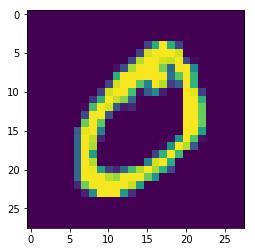

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [4]:
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, immg_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**2 Convolution Layers Architecture**

In [0]:
#convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

W0718 01:38:56.930343 140334869075840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 01:38:56.966439 140334869075840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 01:38:56.974059 140334869075840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 01:38:57.017278 140334869075840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0718 01:38:57.022192 140334869075840 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

W0718 01:38:57.333829 140334869075840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.2533 - acc: 0.9226 - val_loss: 0.0571 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0862 - acc: 0.9742 - val_loss: 0.0387 - val_acc: 0.9876
Epoch 3/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0665 - acc: 0.9799 - val_loss: 0.0335 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0532 - acc: 0.9842 - val_loss: 0.0338 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0464 - acc: 0.9858 - val_loss: 0.0328 - val_acc: 0.9888
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0390 - acc: 0.9883 - val_loss: 0.0298 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0348 - acc: 0.9893 - val_loss: 0.0288 - val_a

Test score: 0.031714727214710726
Test accuracy: 0.9916


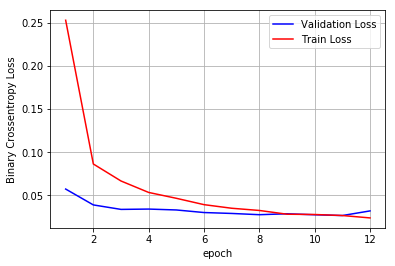

In [9]:

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**3 Convolution Layers Architecture(3x3 kernel size)**

In [10]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(24, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

W0718 01:41:30.901327 140334869075840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 24)        6936      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 24)        0         
__________

3 (64-32-24)Convolution Layers with 3x3 kernel size  and added batch normalization (which normalizes the matrix) as shown good accuracy of 99.38%

Test score: 0.022093793221520584
Test accuracy: 0.9938


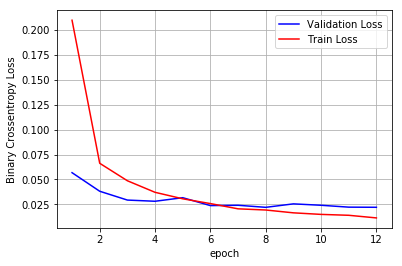

In [11]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**3 Convolution Layers Architecture(5x5 kernel size)**

In [12]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(24, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 32)        51232     
_________________________________________________________________
batch_normalization_4 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 24)        19224     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 24)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 24)          0         
__________

*3* (64-32-24)Convolution Layers with 5x5 kernel size and added batch normalization (which normalizes the matrix) after flatten the data given dense layer of 256 neurons as shown good accuracy of 99.49%(slightly improved results than previous)

Test score: 0.019258051682255427
Test accuracy: 0.9949


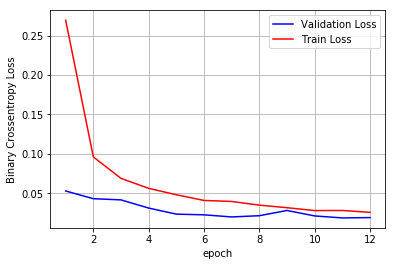

In [13]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**3 Convolution Layers Architecture(7x7 kernel size)**

In [14]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(64, kernel_size=(7,7), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (7,7), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(24, (7,7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 22, 22, 64)        3200      
_________________________________________________________________
batch_normalization_5 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        100384    
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 24)        37656     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 24)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 24)          0         
__________

*3* (64-32-24)Convolution Layers with 7x7 kernel size and added batch normalization (which normalizes the matrix) after flatten the data given dense layer of 256 neurons as shown good accuracy of 99.21%(slightly decreased results than previous)

Test score: 0.03304482104410649
Test accuracy: 0.9921


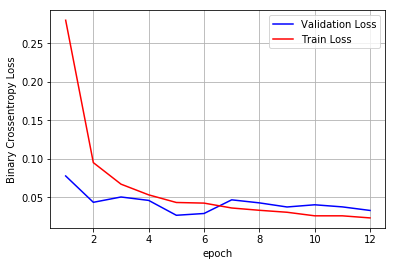

In [15]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**5 Convolution Layers Architecture(3x3 kernel size)**

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(624, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 22, 22, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 128)       0         
__________

5 (32-64-128-256-512)Convolution Layers with 3x3 kernel size and added batch normalization (which normalizes the matrix), maxpooling with strides=2 ,padding as valid after flatten the data given dense layer of 624 neurons as shown good accuracy of 99.42%

Test score: 0.025782507655242898
Test accuracy: 0.9942


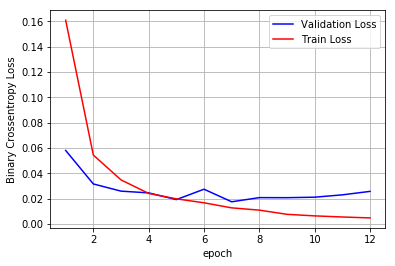

In [17]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**5 Convolution Layers Architecture(5x5 kernel size)**

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(624, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
batch_normalization_13 (Batc (None, 20, 20, 64)        256       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 128)       73856     
_________________________________________________________________
batch_normalization_14 (Batc (None, 18, 18, 128)       512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
__________

5 (32-64-128-256-512)Convolution Layers with 5x5 kernel size and added batch normalization (which normalizes the matrix), maxpooling with strides=1 ,padding as valid after flatten the data given dense layer of 624 neurons as shown good accuracy of 99.33%

Test score: 0.023693369235439785
Test accuracy: 0.9933


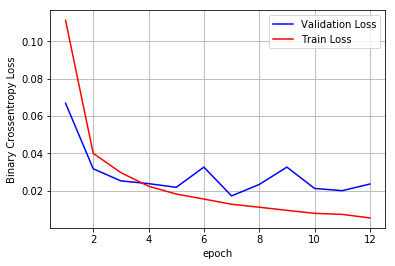

In [19]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**5 Convolution Layers Architecture(7x7 kernel size)**

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (7,7), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(624, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
batch_normalization_17 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        100416    
_________________________________________________________________
batch_normalization_18 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 128)       204928    
_________________________________________________________________
batch_normalization_19 (Batc (None, 12, 12, 128)       512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 128)       0         
__________

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 366us/step - loss: 0.1625 - acc: 0.9533 - val_loss: 0.0883 - val_acc: 0.9745
Epoch 2/12
60000/60000 [==============================] - 19s 312us/step - loss: 0.0539 - acc: 0.9831 - val_loss: 0.0360 - val_acc: 0.9892
Epoch 3/12
60000/60000 [==============================] - 19s 314us/step - loss: 0.0345 - acc: 0.9894 - val_loss: 0.0362 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 19s 314us/step - loss: 0.0264 - acc: 0.9923 - val_loss: 0.0299 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 19s 314us/step - loss: 0.0213 - acc: 0.9934 - val_loss: 0.0236 - val_acc: 0.9934
Epoch 6/12
60000/60000 [==============================] - 19s 311us/step - loss: 0.0183 - acc: 0.9947 - val_loss: 0.0247 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 19s 312us/step - loss: 0.0150 - acc: 0.9955 - val_loss: 0.

5 (32-64-128-256-512)Convolution Layers with 7x7 kernel size and added batch normalization (which normalizes the matrix), maxpooling with strides=1 ,padding as valid after flatten the data given dense layer of 624 neurons as shown good accuracy of 99.19%

Test score: 0.03584375725575774
Test accuracy: 0.9919


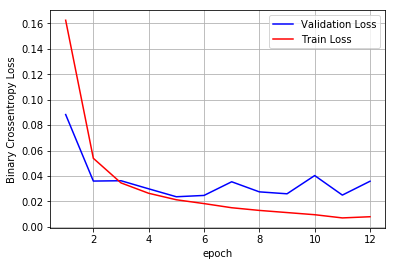

In [22]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**7 Convolution Layers Architecture(3x3 kernel size)**

In [29]:
model = Sequential()
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(456, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(326, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(224, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 512)       5120      
_________________________________________________________________
batch_normalization_36 (Batc (None, 26, 26, 512)       2048      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 456)       2101704   
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 456)       1824      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 22, 22, 326)       1338230   
_________________________________________________________________
batch_normalization_38 (Batc (None, 22, 22, 326)       1304      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 20, 20, 224)       657440    
__________

7 (512-456-326-224-128-64-32)Convolution Layers with 3x3 kernel size and added batch normalization (which normalizes the matrix),  after flatten the data given dense layer of 1024 neurons as shown good accuracy of 99.48%

Test score: 0.017714790364309237
Test accuracy: 0.9948


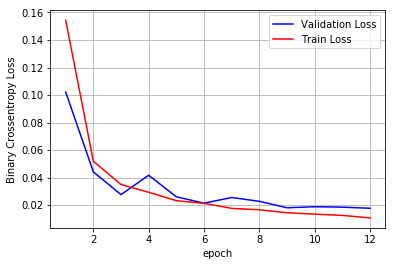

In [30]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**7 Convolution Layers Architecture(5x5 kernel size)**

In [24]:
model = Sequential()
model.add(Conv2D(512, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(456, (5,5), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(326, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(224, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 24, 24, 512)       13312     
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 512)       2048      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 20, 20, 456)       5837256   
_________________________________________________________________
batch_normalization_23 (Batc (None, 20, 20, 456)       1824      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 18, 18, 326)       1338230   
_________________________________________________________________
batch_normalization_24 (Batc (None, 18, 18, 326)       1304      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 224)       657440    
__________

7 (512-456-326-224-128-64-32)Convolution Layers with 5x5 kernel size and added batch normalization (which normalizes the matrix), after flatten the data given dense layer of 1024 neurons as shown good accuracy of 99.47%

Test score: 0.019112644408796314
Test accuracy: 0.9947


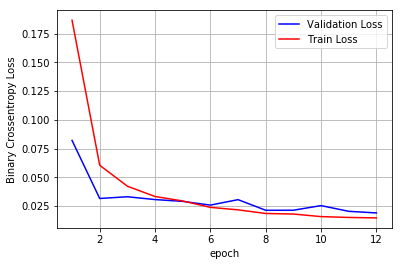

In [25]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**7 Convolution Layers Architecture(7x7 kernel size)**

In [27]:
model = Sequential()
model.add(Conv2D(512, kernel_size=(7,7), activation='relu', input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(456, (7,7), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(326, (5,5), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(224, (5,5), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 22, 22, 512)       25600     
_________________________________________________________________
batch_normalization_29 (Batc (None, 22, 22, 512)       2048      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 456)       11440584  
_________________________________________________________________
batch_normalization_30 (Batc (None, 16, 16, 456)       1824      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 12, 12, 326)       3716726   
_________________________________________________________________
batch_normalization_31 (Batc (None, 12, 12, 326)       1304      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 8, 224)         1825824   
__________

7 (512-456-326-224-128-64-32)Convolution Layers with 5x5 kernel size and added batch normalization (which normalizes the matrix), after flatten the data given dense layer of 1024 neurons as shown good accuracy of 99.21%

Test score: 0.03561010558943635
Test accuracy: 0.9921


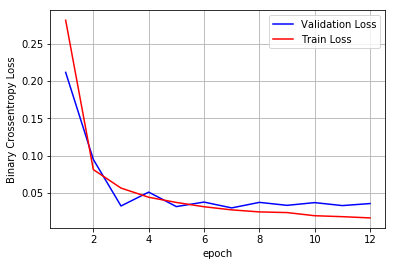

In [28]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)